In [1]:
# IMPORTING ALL THE NECESSARY LIBRARIES AND PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
import math
%matplotlib inline

# data collection

In [27]:
business = pd.read_csv('yelp_academic_dataset_business.csv')
business=business[['business_id','name','address','state','city','postal_code','latitude','longitude',
                   'stars','review_count','is_open','attributes','categories','hours']]
business= business[(business['state'] =='CO')]

print(business["business_id"])


D:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


0         6iYb2HFDywm3zjuRg0shjw
10        rYs_1pNB_RMtn5WQh55QDA
52        Of6xu3pY3eHe2yhiyz2dvg
69        QkLMGBIP5Pp040l0Y9L0iA
158       _8Hejg5Q-_izIhLvq2ocnw
                   ...          
160354    3U_cYt7w_iH0UIX92ivZWQ
160360    nBq1_lN63fAIaeKR9mobCA
160449    lMuRFZtw-AEEpWbpkM8S8w
160504    _MumgpliQR5othcemTy27Q
160565    sSBY50EJ52eYW9uOZ6dRUw
Name: business_id, Length: 3198, dtype: object


In [28]:
business= business[(business['city'] =='Boulder')]
business.shape

(2542, 14)

In [8]:
business['city'].unique()

array(['Boulder', 'Louisville', 'Lafayette', 'Niwot', 'Superior',
       'Longmont', 'Golden', 'Lousiville', 'Aurora', 'Erie', 'Jamestown',
       'Eldorado Springs', 'Denver', 'BOULDER', 'Broomfield', 'Lousville',
       'Gunbarrel', 'Walnut Gardens  Boulder', 'Bolder', 'Gold Hill',
       'Arvada'], dtype=object)

In [29]:
business= business[(business['city'] =='Boulder')]

In [10]:
print(business["business_id"])

0         6iYb2HFDywm3zjuRg0shjw
10        rYs_1pNB_RMtn5WQh55QDA
52        Of6xu3pY3eHe2yhiyz2dvg
69        QkLMGBIP5Pp040l0Y9L0iA
158       _8Hejg5Q-_izIhLvq2ocnw
                   ...          
160283    1xCLhM57CP6mhGDTKN-uRw
160354    3U_cYt7w_iH0UIX92ivZWQ
160449    lMuRFZtw-AEEpWbpkM8S8w
160504    _MumgpliQR5othcemTy27Q
160565    sSBY50EJ52eYW9uOZ6dRUw
Name: business_id, Length: 2542, dtype: object


In [30]:
business = business[business['review_count'] >=500]
business.head()

,business_id,name,address,state,city,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
593,or-Kyw7kmNin1pWbu2RLJw,Lucile's Creole Cafe,2124 14th St,CO,Boulder,80302,40.020092,-105.277655,4.0,628,1,"{'RestaurantsReservations': 'False', 'Business...","Cajun/Creole, Restaurants, Breakfast & Brunch,...","{'Monday': '7:0-14:0', 'Tuesday': '7:0-14:0', ..."
3690,8zehGz9jnxPqXtOc7KaJxA,Brasserie Ten Ten,1011 Walnut St,CO,Boulder,80302,40.016698,-105.282068,4.5,977,0,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Restaurants, French","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
26911,5sg-7zNry9NVs-S6zJj1dg,Centro Mexican Kitchen,950 Pearl St,CO,Boulder,80302,40.017311,-105.282515,4.0,589,1,"{'GoodForKids': 'True', 'HasTV': 'False', 'Bik...","Latin American, Breakfast & Brunch, Restaurant...","{'Monday': '8:0-19:30', 'Tuesday': '8:0-19:30'..."
32083,SFlAWPKHOJEsTttBLUj8Hw,Mountain Sun Pub & Brewery,1535 Pearl St,CO,Boulder,80302,40.019011,-105.275215,4.5,1491,1,"{'RestaurantsAttire': ""'casual'"", 'BYOBCorkage...","Nightlife, Restaurants, Burgers, Bars, Food, B...","{'Monday': '0:0-0:0', 'Tuesday': '12:0-20:0', ..."
42306,guTsOdWQ-YWUHSJ3ubk8PQ,Zoe Ma Ma,2010 10th St,CO,Boulder,80302,40.017612,-105.282553,3.5,516,1,"{'BikeParking': 'True', 'Alcohol': ""u'beer_and...","Restaurants, Chinese","{'Monday': '11:0-20:0', 'Tuesday': '11:0-20:0'..."


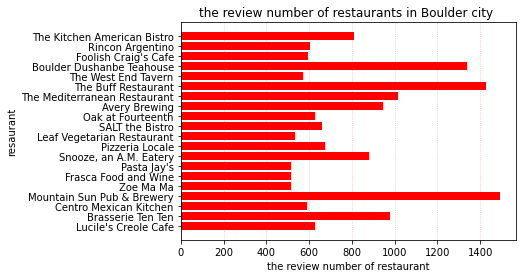

In [43]:
from matplotlib import pyplot as plt
from matplotlib import font_manager
a = business['name']
b = business['review_count']
plt.barh(range(len(a)),[float(i) for i in b],align='center',color="r")
plt.xlabel("the review number of restaurant")
plt.ylabel("resaurant")
plt.grid(True,axis="x",ls=":",color="r",alpha=0.3)
plt.yticks(range(len(a)),a)
plt.title('the review number of restaurants in Boulder city ')
plt.show()

In [21]:
data = pd.read_csv('yelp_academic_dataset_review.csv')

In [22]:
data1=data[data['business_id']=='6iYb2HFDywm3zjuRg0shjw']
data1.shape

(86, 9)

In [24]:
infridge1=business[['business_id','stars','review_count','is_open','attributes','categories','hours']]
reviews=data.merge(infridge1,how = 'inner',on='business_id')
reviews.shape

(117585, 15)

In [ ]:
reviews.to_csv('reviews.csv')

In [ ]:
data = pd.read_csv('yelp_academic_dataset_review.csv')
# data.head()

In [ ]:
data['date'] = pd.to_datetime(data['date'])
data = data[(data['date'] >=pd.to_datetime('20120101')) & (data['date'] <= pd.to_datetime('20151231'))]
data.head(10)
data.shape

In [32]:
business = pd.read_csv('yelp_academic_dataset_business.csv',nrows=1000)
business=business[['business_id','name','address','state','city','postal_code','latitude','longitude',
                   'stars','review_count','is_open','attributes','categories','hours']]
# business.head()
print(business.shape)
business['state'].unique()

(1000, 14)


array(['CO', 'OR', 'FL', 'GA', 'BC', 'OH', 'TX', 'MA', 'WA'], dtype=object)

In [33]:
infridge=business['business_id']
# infridge.head()
review=data.merge(infridge,how = 'inner',on='business_id')
review.shape

(9186, 9)

In [34]:
review.head()

,stars,text,business_id,date,review_id,cool,user_id,funny,useful
0,4.0,The dishes were executed flawlessly and they w...,J8Ha6yIvGoU-E31jnCq7Ew,2015-08-30 15:10:19,yGDI9Tvb4i6RoWEiil0T1w,2,_A9_70EAJWVP5rwx1gOTDg,1,3
1,5.0,One if the best dining experiences we've ever ...,J8Ha6yIvGoU-E31jnCq7Ew,2014-11-30 02:30:02,V48p21PUtlYPE-YohBg_pg,1,syzY5EWRIbFX_MfaAslwuA,0,1
2,5.0,At Barley Swine you are left in the capable ha...,J8Ha6yIvGoU-E31jnCq7Ew,2015-06-08 20:45:16,3glazJleJskKp8at-5-zig,0,ZsUSGU1-L1ImomLZjXxxTg,0,3
3,2.0,I visited this place on a weekday and was not ...,J8Ha6yIvGoU-E31jnCq7Ew,2014-01-17 19:10:26,m2MK2DZVRos4B2F_1U3cwA,2,Db8T4MmkIdVNGr8zzjcn8w,1,6
4,3.0,This is a review for their Happy Hour (5:30-6:...,J8Ha6yIvGoU-E31jnCq7Ew,2015-11-18 20:33:14,Q2cMq0-ghZAxHK00AaON0A,4,Yein9ksmyFA_8OxxMzjnCg,3,3


In [37]:
infridge1=review['user_id']
users=user.merge(infridge1,how = 'inner',on='user_id')
users.shape

(9186, 22)

In [5]:
reviews = pd.read_csv('reviews.csv')
reviews.head()

,Unnamed: 0,stars_x,text,business_id,date,review_id,cool,user_id,funny,useful,stars_y,review_count,is_open,attributes,categories,hours
0,0,4.0,The food is always great here. The service fro...,8zehGz9jnxPqXtOc7KaJxA,2011-07-28 18:05:01,sjm_uUcQVxab_EeLCqsYLg,0,0kA0PAJ8QFMeveQWHFqz2A,0,0,4.5,977,0,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Restaurants, French","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
1,1,2.0,Brasserie zero zero... we were hoping for a te...,8zehGz9jnxPqXtOc7KaJxA,2018-08-04 20:52:32,eiAeuhR3kurAO8rAt_rhlg,0,7zEJt0NVl-lMiMwkCsvteg,0,0,4.5,977,0,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Restaurants, French","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
2,2,5.0,I absolutely love this restaurant. I've been c...,8zehGz9jnxPqXtOc7KaJxA,2014-04-01 02:29:55,Ye8Uh3aBfGoEWgC7DEI8YA,1,32HQqHGHqcDnNteK835C-Q,0,0,4.5,977,0,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Restaurants, French","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
3,3,5.0,The food is great! One of my fav brunch spots...,8zehGz9jnxPqXtOc7KaJxA,2018-05-08 17:16:08,24rHI3jxOd-vaITbjlQvag,0,0NB-ew_8OZ3Q4ysdKQEYrQ,0,0,4.5,977,0,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Restaurants, French","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
4,4,5.0,Went here for dinner in day two of our trip. I...,8zehGz9jnxPqXtOc7KaJxA,2015-05-12 17:05:35,2DJcGZmVx0BfsW7HlDrLfQ,0,vTnG9uPwbnWCJRg3EuzNcg,0,2,4.5,977,0,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Restaurants, French","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."


In [6]:
reviews1 = reviews[reviews['review_count'] >=100]
reviews1.shape

(67275, 16)

In [7]:
# reviews.head()
reviews1.to_csv('reviews1.csv')

In [8]:
reviews2 = reviews[reviews['review_count'] >=200]
print(reviews2.shape)
reviews2.to_csv('reviews2.csv')

(42909, 16)


In [11]:
reviews3 = reviews[reviews['review_count'] >=500]
print(reviews3.shape)
reviews3.to_csv('reviews3.csv')

(16301, 16)


In [ ]:
# reviews.csv when business "state"='CO' and 'city'='Boulder', the number is 117585  , non user ifo
# reviews1.csv when business 'review_count'>=100 in reviews.csv, the number is 67275 , non user ifo
# reviews2.csv when business 'review_count'>=200 in reviews.csv, the number is 42909 , non user ifo
# reviews3.csv when business 'review_count'>=500 in reviews.csv, the number is 16301 , non user ifo

In [12]:
user = pd.read_csv('yelp_academic_dataset_user.csv')
user.sort_values("review_count",inplace=True)
user.head()

,average_stars,funny,useful,friends,compliment_more,compliment_photos,compliment_list,user_id,yelping_since,compliment_cool,...,review_count,elite,compliment_profile,fans,compliment_plain,compliment_hot,name,compliment_cute,compliment_writer,cool
1427838,5.0,0,0,o69CwBc0cBFKYDEHNSBP4w,0,0,0,FeopsMJV5XVHOrvn6SSwCg,2016-10-09 19:36:13,0,...,0,NaN,0,0,0,0,Nicole,0,0,0
1836324,5.0,0,1,"o4qLQ9xDxopOxkD5sYte_g, -xry1-Ojrt-Sj_G3vwzJLw",0,0,0,kYQqKJCI7ejIGhnKiSWc4w,2014-08-08 03:42:52,0,...,0,NaN,0,0,0,0,Jena,0,0,0
1381214,5.0,0,0,"dgphf3mU9Vi_fSYKbhgOVg, xNjGe1Ej0yPSkUz-RC53XA...",0,0,0,CmoK8leNBK0WcNq-fxVvOQ,2015-11-30 03:33:02,0,...,0,NaN,0,0,0,0,Cozzy,0,0,0
1818615,5.0,0,0,"DSBxOwd2im26HstNZb58UA, szr8GTYZVGprCCclkCWFFA...",0,0,0,jio-AEIygJV_bRoEsuYChA,2019-01-25 20:00:24,0,...,0,NaN,0,0,0,0,Pinkie,0,0,0
556850,1.0,1,0,"opxjdKrJHEvZhryldH-UWg, jI4G6wJK8DIsyGevgbrH3g...",0,0,0,kjOJpw968ru-2Z096SfIuQ,2019-11-09 01:39:07,0,...,0,NaN,0,0,0,0,Prince,0,0,0


In [13]:
user=user[['user_id','yelping_since','fans','average_stars']]
user.head()


,user_id,yelping_since,fans,average_stars
1427838,FeopsMJV5XVHOrvn6SSwCg,2016-10-09 19:36:13,0,5.0
1836324,kYQqKJCI7ejIGhnKiSWc4w,2014-08-08 03:42:52,0,5.0
1381214,CmoK8leNBK0WcNq-fxVvOQ,2015-11-30 03:33:02,0,5.0
1818615,jio-AEIygJV_bRoEsuYChA,2019-01-25 20:00:24,0,5.0
556850,kjOJpw968ru-2Z096SfIuQ,2019-11-09 01:39:07,0,1.0


In [14]:
infridge2=user
reviews4=reviews3.merge(infridge2,how = 'inner',on='user_id')
reviews4.shape

(16301, 19)

In [15]:
reviews4.head()

,Unnamed: 0,stars_x,text,business_id,date,review_id,cool,user_id,funny,useful,stars_y,review_count,is_open,attributes,categories,hours,yelping_since,fans,average_stars
0,0,4.0,The food is always great here. The service fro...,8zehGz9jnxPqXtOc7KaJxA,2011-07-28 18:05:01,sjm_uUcQVxab_EeLCqsYLg,0,0kA0PAJ8QFMeveQWHFqz2A,0,0,4.5,977,0,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Restaurants, French","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",2010-10-12 00:40:13,2,4.15
1,1,2.0,Brasserie zero zero... we were hoping for a te...,8zehGz9jnxPqXtOc7KaJxA,2018-08-04 20:52:32,eiAeuhR3kurAO8rAt_rhlg,0,7zEJt0NVl-lMiMwkCsvteg,0,0,4.5,977,0,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Restaurants, French","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",2012-07-15 22:43:57,0,3.56
2,2,5.0,I absolutely love this restaurant. I've been c...,8zehGz9jnxPqXtOc7KaJxA,2014-04-01 02:29:55,Ye8Uh3aBfGoEWgC7DEI8YA,1,32HQqHGHqcDnNteK835C-Q,0,0,4.5,977,0,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Restaurants, French","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",2008-02-15 17:19:41,6,4.25
3,1917,5.0,"I love you, Lucile's. \r\n\r\nI love your chai...",or-Kyw7kmNin1pWbu2RLJw,2011-07-28 23:27:24,CkDybuShgzu5QD1n5KvXjQ,1,32HQqHGHqcDnNteK835C-Q,1,1,4.0,628,1,"{'RestaurantsReservations': 'False', 'Business...","Cajun/Creole, Restaurants, Breakfast & Brunch,...","{'Monday': '7:0-14:0', 'Tuesday': '7:0-14:0', ...",2008-02-15 17:19:41,6,4.25
4,22324,3.0,"Pasta Jays, what can I say? You knocked my soc...",eRlc-vfvnl9ai8RydqZfOw,2011-07-28 23:05:38,D2kXXOT9Fry0nK_UpI7HWg,1,32HQqHGHqcDnNteK835C-Q,0,2,3.5,516,1,"{'GoodForKids': 'True', 'HasTV': 'True', 'Alco...","Restaurants, Pizza, Italian","{'Monday': '0:0-0:0', 'Tuesday': '12:0-21:0', ...",2008-02-15 17:19:41,6,4.25


In [21]:
# reviews4['review_star']=reviews4['stars_x']
# reviews4['business_star']=reviews4['stars_y']
reviews4=reviews4.drop(['stars_y'],axis=1)
reviews4.head()

,text,business_id,date,review_id,cool,user_id,funny,useful,review_count,is_open,attributes,categories,yelping_since,fans,average_stars,review_star,business_star
0,The food is always great here. The service fro...,8zehGz9jnxPqXtOc7KaJxA,2011-07-28 18:05:01,sjm_uUcQVxab_EeLCqsYLg,0,0kA0PAJ8QFMeveQWHFqz2A,0,0,977,0,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Restaurants, French",2010-10-12 00:40:13,2,4.15,4.0,4.5
1,Brasserie zero zero... we were hoping for a te...,8zehGz9jnxPqXtOc7KaJxA,2018-08-04 20:52:32,eiAeuhR3kurAO8rAt_rhlg,0,7zEJt0NVl-lMiMwkCsvteg,0,0,977,0,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Restaurants, French",2012-07-15 22:43:57,0,3.56,2.0,4.5
2,I absolutely love this restaurant. I've been c...,8zehGz9jnxPqXtOc7KaJxA,2014-04-01 02:29:55,Ye8Uh3aBfGoEWgC7DEI8YA,1,32HQqHGHqcDnNteK835C-Q,0,0,977,0,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Restaurants, French",2008-02-15 17:19:41,6,4.25,5.0,4.5
3,"I love you, Lucile's. \r\n\r\nI love your chai...",or-Kyw7kmNin1pWbu2RLJw,2011-07-28 23:27:24,CkDybuShgzu5QD1n5KvXjQ,1,32HQqHGHqcDnNteK835C-Q,1,1,628,1,"{'RestaurantsReservations': 'False', 'Business...","Cajun/Creole, Restaurants, Breakfast & Brunch,...",2008-02-15 17:19:41,6,4.25,5.0,4.0
4,"Pasta Jays, what can I say? You knocked my soc...",eRlc-vfvnl9ai8RydqZfOw,2011-07-28 23:05:38,D2kXXOT9Fry0nK_UpI7HWg,1,32HQqHGHqcDnNteK835C-Q,0,2,516,1,"{'GoodForKids': 'True', 'HasTV': 'True', 'Alco...","Restaurants, Pizza, Italian",2008-02-15 17:19:41,6,4.25,3.0,3.5


In [24]:
reviews4['user_star']=reviews4['average_stars']
reviews4=reviews4.drop(['average_stars'],axis=1)
reviews4.head()
# reviews3.csv when business 'review_count'>=500 in reviews.csv, the number is 16301 , with user ifo
# reviews4.to_csv('reviews4.csv')

,text,business_id,date,review_id,cool,user_id,funny,useful,review_count,is_open,attributes,categories,yelping_since,fans,review_star,business_star,user_star
0,The food is always great here. The service fro...,8zehGz9jnxPqXtOc7KaJxA,2011-07-28 18:05:01,sjm_uUcQVxab_EeLCqsYLg,0,0kA0PAJ8QFMeveQWHFqz2A,0,0,977,0,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Restaurants, French",2010-10-12 00:40:13,2,4.0,4.5,4.15
1,Brasserie zero zero... we were hoping for a te...,8zehGz9jnxPqXtOc7KaJxA,2018-08-04 20:52:32,eiAeuhR3kurAO8rAt_rhlg,0,7zEJt0NVl-lMiMwkCsvteg,0,0,977,0,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Restaurants, French",2012-07-15 22:43:57,0,2.0,4.5,3.56
2,I absolutely love this restaurant. I've been c...,8zehGz9jnxPqXtOc7KaJxA,2014-04-01 02:29:55,Ye8Uh3aBfGoEWgC7DEI8YA,1,32HQqHGHqcDnNteK835C-Q,0,0,977,0,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Restaurants, French",2008-02-15 17:19:41,6,5.0,4.5,4.25
3,"I love you, Lucile's. \r\n\r\nI love your chai...",or-Kyw7kmNin1pWbu2RLJw,2011-07-28 23:27:24,CkDybuShgzu5QD1n5KvXjQ,1,32HQqHGHqcDnNteK835C-Q,1,1,628,1,"{'RestaurantsReservations': 'False', 'Business...","Cajun/Creole, Restaurants, Breakfast & Brunch,...",2008-02-15 17:19:41,6,5.0,4.0,4.25
4,"Pasta Jays, what can I say? You knocked my soc...",eRlc-vfvnl9ai8RydqZfOw,2011-07-28 23:05:38,D2kXXOT9Fry0nK_UpI7HWg,1,32HQqHGHqcDnNteK835C-Q,0,2,516,1,"{'GoodForKids': 'True', 'HasTV': 'True', 'Alco...","Restaurants, Pizza, Italian",2008-02-15 17:19:41,6,3.0,3.5,4.25


In [25]:
reviews4.to_csv('reviews4.csv')